<a href="https://colab.research.google.com/github/khizon/Datacamp_data_scientist_certification/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Scientist Associate Case Study

## Company Background
GoalZone is a fitness club chain providing five types of fitness classes in Canada. Finally, the fitness classes schedule is back to normal after the COVID-19 restrictions are lifted. However, they have received many complaints from the customers about having a hard time booking a fitness class.

From initial analysis, the program operation team found out that the fitness classes are always fully booked but are having a low attendance rate per class. To improve this situation, they would like to increase the class capacity for customers to sign up if a low attendance rate is predicted.  


## Customer Question
The operation manager has asked you to answer the following:
- Can you predict the attendance rate for each fitness class? 



## Dataset
The dataset contains the attendance information for the class scheduled this year so far. The data you will use for this analysis can be accessed here: `"data/fitness_class.csv"`

| Column Name                     | Criteria                                                                                                                                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Day of Week                     | Character, the day of the week the class was scheduled, one of values from “Mon” to “Sun”.                                                                                      |
| Time                            | Character, the time of the day the class was scheduled, either "AM" or "PM".                                                                                                        |
| Class Category                  | Character, the category of the fitness class, one of “Yoga”, “Aqua”, “Strength”, “HIIT”, or “Cycling”.                                                                          |
| Days Before                     | Numeric, number of days the class stayed fully booked, maximum five days.                                                                                                       |
| Class Capacity                  | Numeric, maximum number of members can sign up for that class, either 15 or 25.  The class capacity being 26 needs to be updated to 25.                                         |
| Attendance                      | Numeric, number of members actually attended the class.                                                                                                                         |
| Average Age                     | Numeric, average age of the members signing up for that class.  Remove rows that average age is smaller than 14 because group fitness class are for members aged 14 and order.  |
| Number of New Students          | Numeric, number of new students signing up for this class.                                                                                                                      |
| Number of Members Over 6 months | Numeric, number of members signing up for the class have been joining the club more than 6 months.                                                                              |                                                                                     |

# Data Scientist Associate Case Study Submission

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette("colorblind")
sns.set(rc={'figure.figsize':(5,5)})

In [ ]:
df = pd.read_csv("data/fitness_class.csv")
df.head()

,day_of_week,time,class_category,class_capacity,days_before,attendance,age,new_students,over_6_month
0,Wed,AM,Yoga,15,1,8,31.1,6,4
1,Sun,PM,Aqua,15,3,8,27.0,7,8
2,Mon,AM,Aqua,15,5,10,22.4,8,7
3,Sun,PM,Strength,25,3,18,23.5,7,9
4,Mon,AM,Yoga,15,5,10,29.8,5,7


## Data Validation

In [ ]:
# Check all variables in the data against the criteria in the dataset above

# Categorical Variables
cat_vars = ['day_of_week', 'time', 'class_category']

for cat in cat_vars:
    print(f'{cat}: {df[cat].unique()}')

day_of_week: ['Wed' 'Sun' 'Mon' 'Tue' 'Thu' 'Sat' 'Fri']
time: ['AM' 'PM']
class_category: ['Yoga' 'Aqua' 'Strength' 'HIIT' 'Cycling']


In [ ]:
# Numerical Variables
print(df.shape)
df.describe()

(765, 9)


,class_capacity,days_before,attendance,age,new_students,over_6_month
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,17.542484,2.547712,9.563399,29.092680,5.917647,7.577778
std,4.365481,1.355379,3.896598,5.912063,1.789224,1.974518
min,15.000000,1.000000,4.000000,8.300000,1.000000,2.000000
25%,15.000000,1.000000,7.000000,25.300000,5.000000,6.000000
50%,15.000000,2.000000,9.000000,29.000000,6.000000,8.000000
75%,25.000000,4.000000,11.000000,33.200000,7.000000,9.000000
max,26.000000,5.000000,21.000000,48.800000,11.000000,13.000000


As stated in the dataset description, `class_capacity` has wrong values that exceeded 25, and (mean) `age` has values below 14.

In [ ]:
# Fix class_capacity (26 -> 25)
df.loc[df['class_capacity'] == 26, 'class_capacity'] = 25

# Drop rows with (mean) age below 14
df.drop(df[df['age']<14].index, inplace=True)

# Check the data again
print(df.shape)
df.describe()

(762, 9)


,class_capacity,days_before,attendance,age,new_students,over_6_month
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,17.506562,2.547244,9.519685,29.163648,5.912073,7.565617
std,4.336755,1.355768,3.841164,5.812547,1.788821,1.968617
min,15.000000,1.000000,4.000000,14.000000,1.000000,2.000000
25%,15.000000,1.000000,7.000000,25.300000,5.000000,6.000000
50%,15.000000,2.000000,9.000000,29.000000,6.000000,8.000000
75%,22.500000,4.000000,11.000000,33.200000,7.000000,9.000000
max,25.000000,5.000000,21.000000,48.800000,11.000000,13.000000


**Categorical Columns**
* `day_of_week`, `time`, `class_category`
* For the columns which has finite and discrete set of values, all their unique values were printed out to look for "extra categories" or "typo errors".


**Numerical Columns**
* `class_capacity`, `days_before`, `attendance`, `age`, `new_students`, `over_6_months`
* For the numeric columns, the `describe()` method was use to show their distributions and their min and max values.
* While `class_capacity` is a numerical column, since it is supposed to have only 2 values, it will be considered as categorical in the analysis. Data entries where `class_capacity` = 26 has been found.
* Since the min value of the `age` column is below 14, shows that there are erroneous rows.

**Validation Steps**
* Referring to the dataset description, all entries where the `class_capacity` is "26" has been replaced with "25".
* Additionally, all rows where the (mean) `age` is below 14 has been dropped (3 rows).

## Exploratory Analysis

In [ ]:
# Create attendance_rate column
df['attendance_rate'] = df['attendance']/df['class_capacity']
df['attendance_rate'].describe()


count    762.000000
mean       0.542152
std        0.162767
min        0.266667
25%        0.400000
50%        0.533333
75%        0.666667
max        0.840000
Name: attendance_rate, dtype: float64

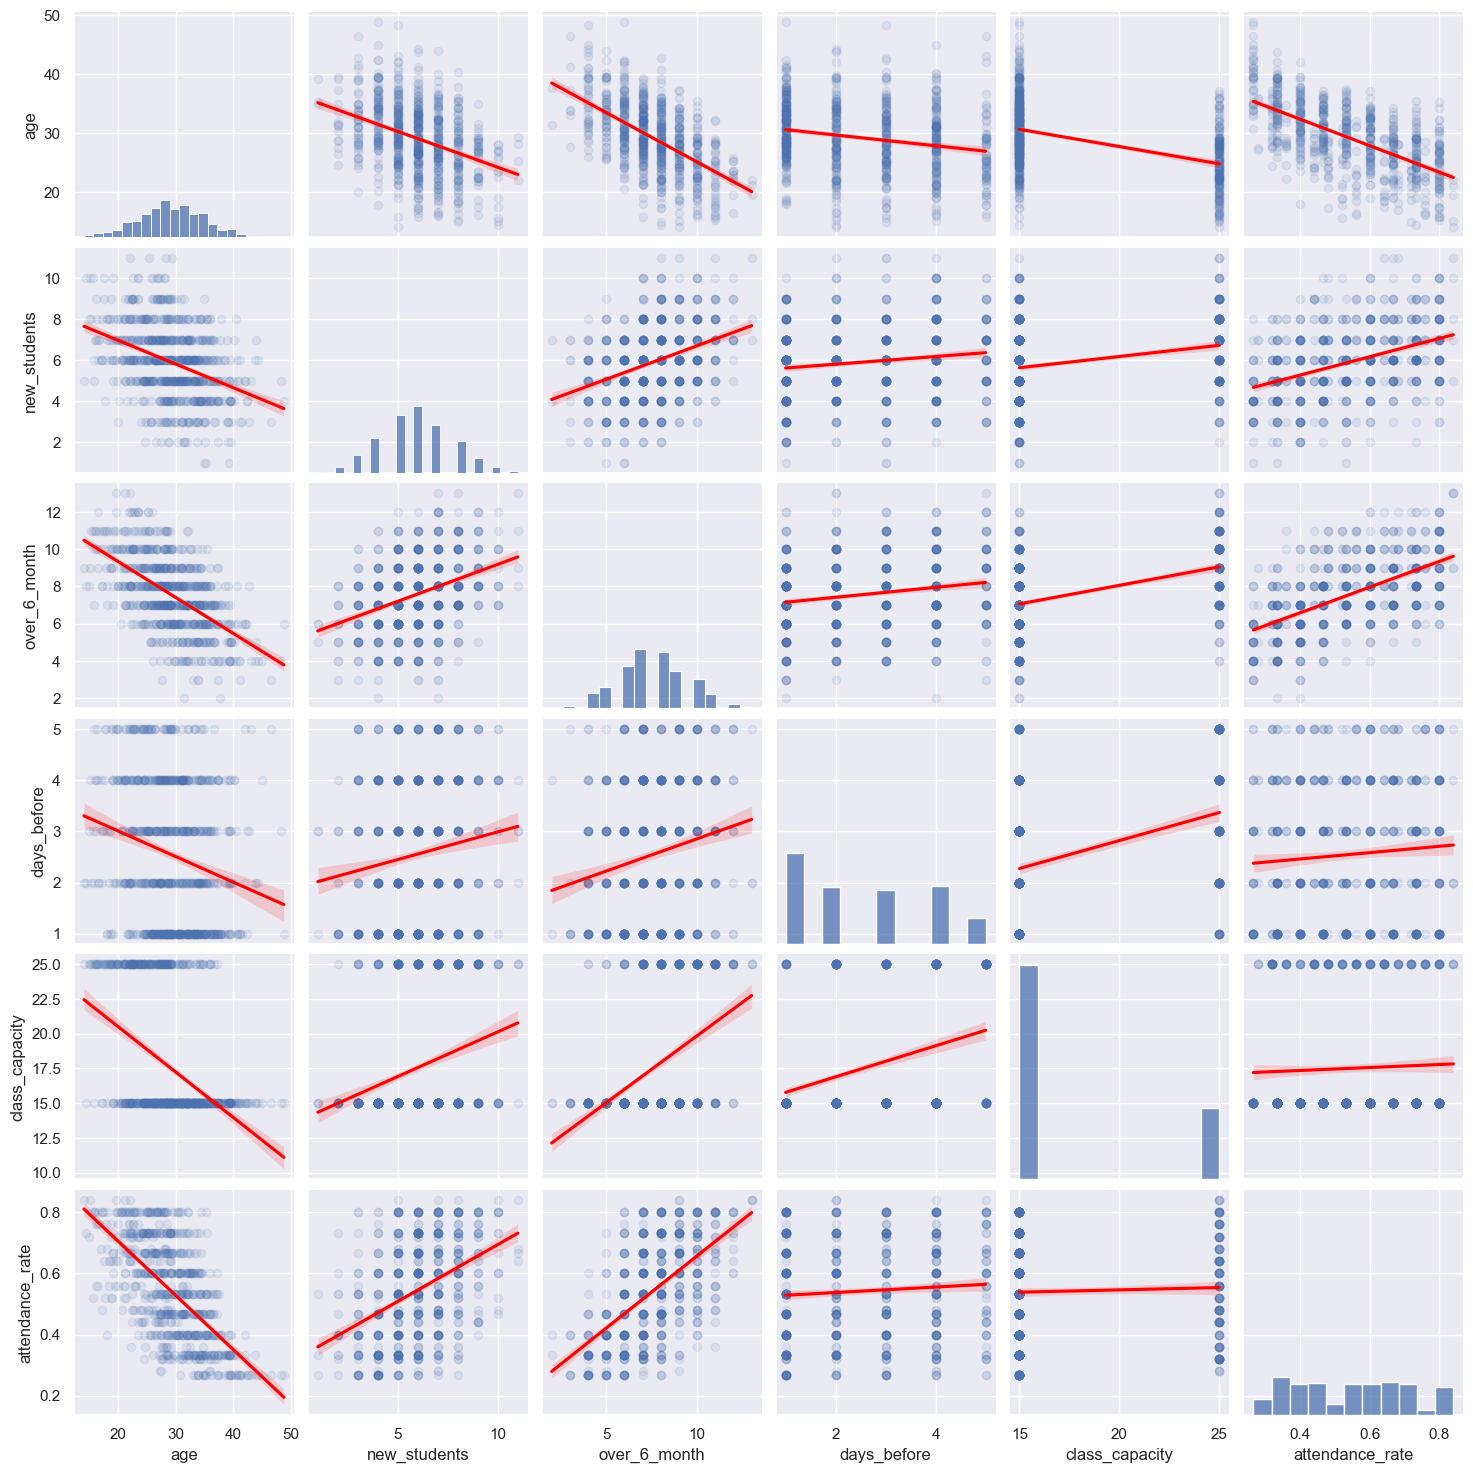

In [ ]:
# Pairplot shows a scatterplot for each pair of variable (with a regression line) and on the diagonals, show a histogram of each variable. This shows the distribution of individual variables and their correlation.

num_vars = ['age', 'new_students', 'over_6_month', 'days_before', 'class_capacity', 'attendance_rate']
sns.pairplot(df[num_vars], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
plt.show()

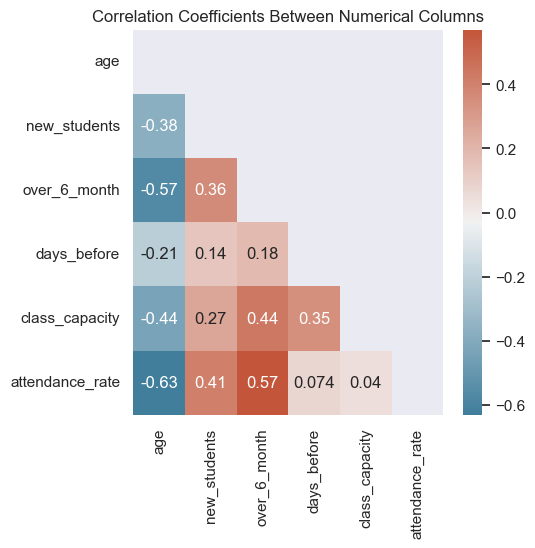

In [ ]:
# Computing the coefficient of linear correlation between variables

corr = df[['age', 'new_students', 'over_6_month', 'days_before', 'class_capacity', 'attendance_rate']].corr()
# Generate a mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.title('Correlation Coefficients Between Numerical Columns')
plt.yticks(rotation=0) 
plt.show()

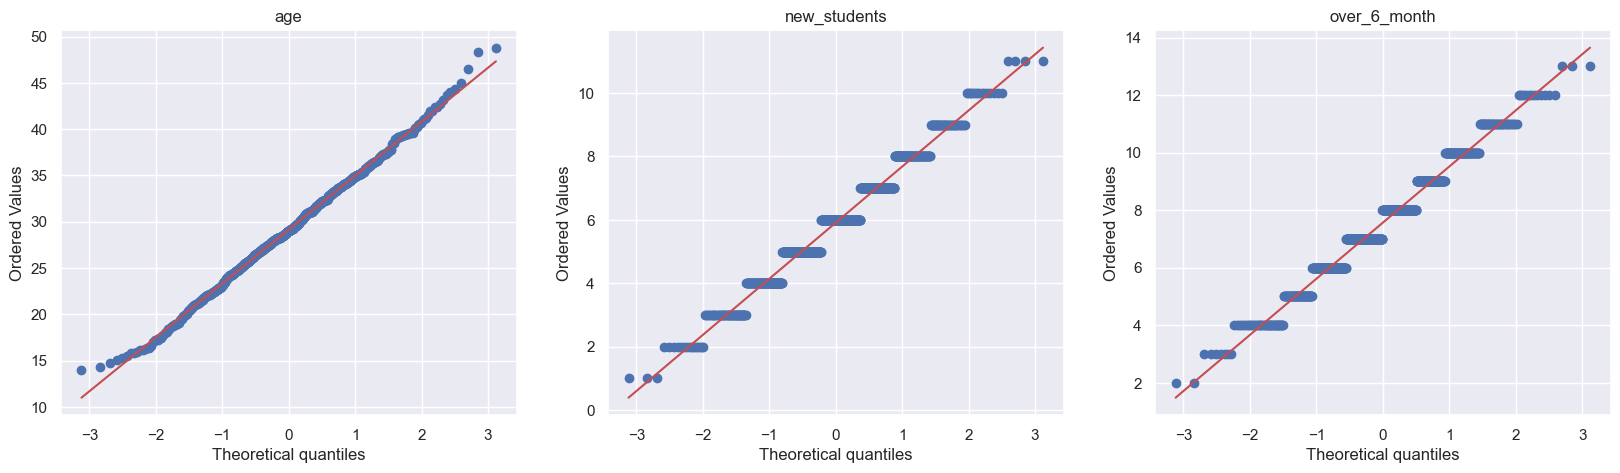

In [ ]:
# a qq-plot compares the distribution of a variable against the normal distribution. The closer the dots fit the line, the closer the variable are to being normally distributed.
import scipy.stats as stats

test_vars = ['age', 'new_students', 'over_6_month']
fig, axes = plt.subplots(1, 3, figsize=(20,5))
for i, test in enumerate(test_vars):
    stats.probplot(df[test], dist="norm", plot=axes[i])
    axes[i].title.set_text(test)
plt.show()

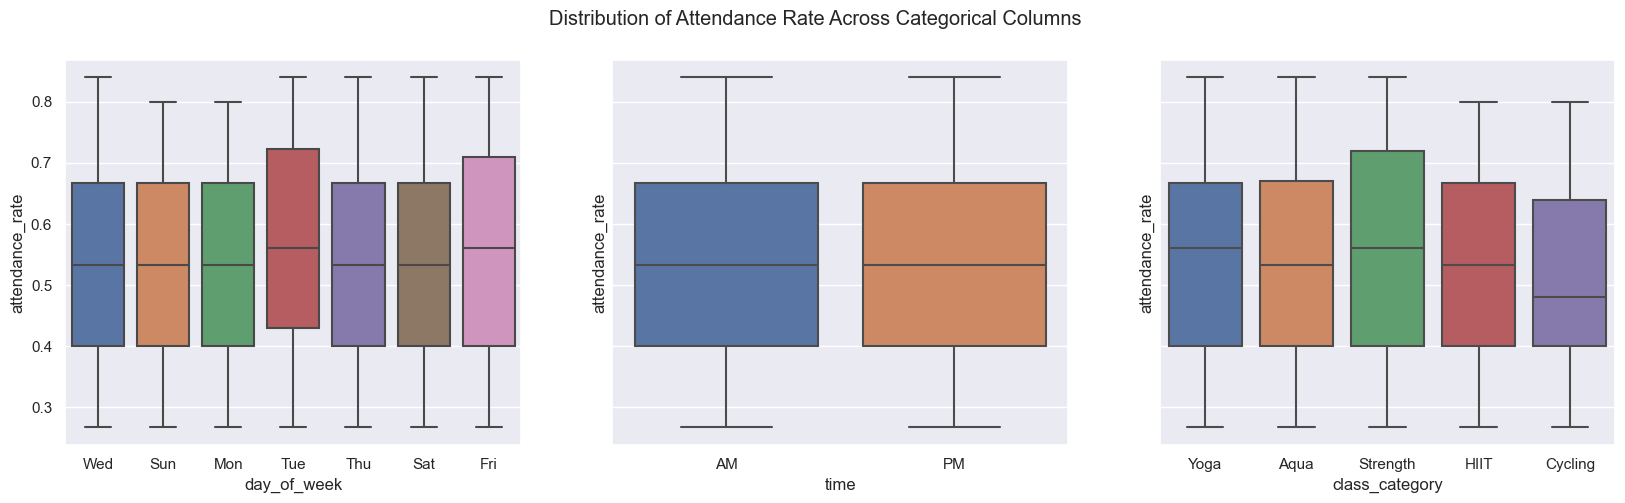

In [ ]:
# Box plot show the distribution of a continuous variable and it can be broken down for each unique value of a categorical variable
fig, axes = plt.subplots(1, len(cat_vars), figsize=(20,5), sharey=True)
for i, cat in enumerate(cat_vars):
    sns.boxplot(ax=axes[i], data=df, y='attendance_rate', x=cat)
plt.suptitle('Distribution of Attendance Rate Across Categorical Columns')
plt.show()

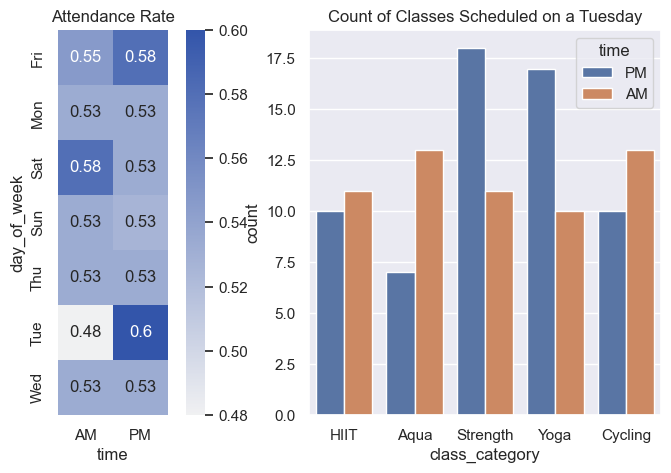

In [ ]:
# A pivot table is a nice summary when looking at the value of your target variable across the different values of a pair of categorical variable
fig, axes = plt.subplots(1,2, figsize=(10, 5))
cmap = sns.color_palette("light:#35A", as_cmap=True)
pivot = pd.pivot_table(data=df, values='attendance_rate',
                       index='day_of_week',
                       columns='time',
                       aggfunc=np.median)
sns.heatmap(pivot, annot=True, cmap=cmap, ax=axes[0], square=True)
axes[0].title.set_text('Attendance Rate')
sns.countplot(data=df[df['day_of_week']=='Tue'], x='class_category', hue='time',ax=axes[1])
axes[1].title.set_text('Count of Classes Scheduled on a Tuesday')
plt.show()


Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

**Insights**
* 75% of the class have less than 66% attendance rate (75th percentile)
* Using the histogram of the pairplot, attendance rates are almost uniformly distributed with a few outlier values. Age, new members, and over 6 month members, follow a normal distribution. The qq-plot also confirm this close to normal distribution as they fit the normal-line closely.
* From both the scatterplot in the pairplot, and the correlation computation, classes with higher average ages tend to have low attendance rates (negative correlation), and classes with higher sign-ups (both new and over 6 month members) tend to have higher attendance rates (positive correlation).
* The distribution of attendance rates has been broken down accross categories using box plots.
	* Tuesdays and Fridays have higher median attendance rates
    * Attendance rates between AM and PM classes are very similar.
    * In terms of class activity, strength and yoga classes have higher attendance rates while cycling have the lowest.
* Diving deeper into the combination of time and day, Tuesdays both have the highest (PM) and lowest (AM) attendance rates.
	* Filtering only classes scheduled on Tuesdays, and then breaking it up by class activity and time, it was shown in the countplot that strength and yoga classes (high attendance rate activity) occur a lot during Tuesday (PM) and infrequently during Tuesday (AM).

**Summary**
* High ammount of early sign ups is a good indicator of attendance rate. Certain schedules (Tue PM, Fri PM, Sat AM) and certain activities (strength and yoga) are also good indicators for attendance rate. Sign ups with older average ages however can indicate lower attendance rate.


## Model Fitting and Evaluation

In [ ]:
# Model Fitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedKFold, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn import set_config
set_config(display='diagram')

In [ ]:
df_clean = df.drop('attendance', axis=1)
X = df_clean.drop('attendance_rate', axis=1)
y = df_clean['attendance_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, shuffle=True)

print(f'Train: {X_train.shape} {y_train.shape}')
print(f'Test: {X_test.shape} {y_test.shape}')

Train: (609, 8) (609,)
Test: (153, 8) (153,)


### Naive Estimator (Mean of y_train)

In [ ]:
y_pred = np.ones(y_test.shape)*y_train.mean()
print(f'Naive RMSE: {np.sqrt(mean_squared_error(y_pred, y_test))}')

Naive RMSE: 0.16541376177840117


### Trying different models

In [ ]:
# Preprocessing
ct = ColumnTransformer(
	[
        ('quad', PolynomialFeatures(2), ['age']),
        ('scale', StandardScaler(), ['new_students', 'over_6_month']),
        ('categorical', OneHotEncoder(), ['day_of_week', 'time', 'class_category'])
    ],
    remainder='passthrough'
)

ct_rf = ColumnTransformer(
	[
        ('categorical', OrdinalEncoder(), ['day_of_week', 'time', 'class_category'])
    ],
    remainder='passthrough'
)

In [ ]:
def eval_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=9)
	scores = -cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [ ]:
# Model Validation
results = []
model_names = []

# Linear Regression
pipe_linear = Pipeline(
	steps = [
        ('transform', ct),
        ('regressor', LinearRegression())
    ]
)

# Ridge
pipe_ridge = Pipeline(
	steps = [
        ('transform', ct),
        ('regressor', Ridge())
    ]
)

# Random Forest
pipe_rf = Pipeline(
	steps = [
        ('transform', ct_rf),
        ('regressor', RandomForestRegressor(random_state=9))
    ]
)

regressors = {
    'linear': pipe_linear,
    'ridge': pipe_ridge,
    'rf': pipe_rf,
}

for name, regressor in regressors.items():
    scores = eval_model(regressor, X_train, y_train)
    results.append(scores)
    model_names.append(name)
    print('>%s %.5f (%.3f)' % (name, np.mean(scores), np.std(scores)))


>linear 0.10286 (0.007)
>ridge 0.10283 (0.007)
>rf 0.10976 (0.007)


In [ ]:
# Fine tuned ridge regression model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=9)
params = {'regressor__alpha': np.arange(0.1, 20, 0.1)}

ridge_reg = RandomizedSearchCV(estimator=pipe_ridge, param_distributions=params, n_iter=50,
                               cv=cv, random_state=9, n_jobs=-1, return_train_score=True,
                               scoring='neg_root_mean_squared_error')
ridge_reg.fit(X_train,y_train)

# Add the Cross validation test results to the list of results
ridge_results = pd.DataFrame(ridge_reg.cv_results_)
model_names.append('Ridge (tuned)')
results.append(-1*ridge_results[ridge_results['rank_test_score']==1].iloc[:,6:36].values[0])

print('>%s %.5f (%.3f)' % (model_names[-1], np.mean(results[-1]), np.std(results[-1])))

>Ridge (tuned) 0.10256 (0.007)


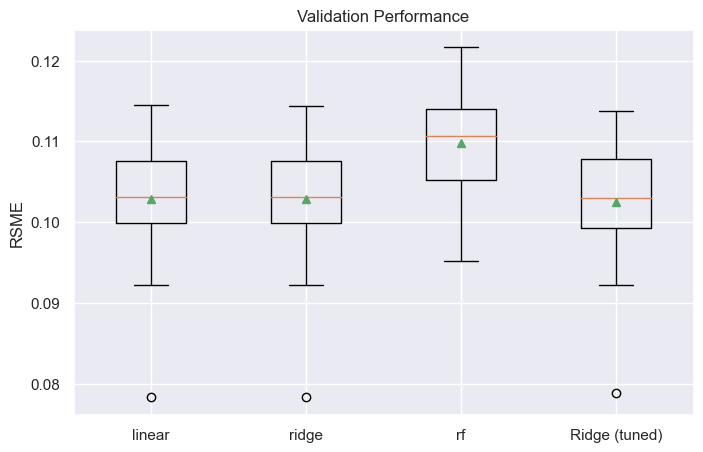

In [ ]:
plt.figure(figsize=(8, 5))
plt.boxplot(results, labels=model_names, showmeans=True)
plt.title('Validation Performance')
plt.ylabel('RSME')
plt.show()

**Model Fitting**

**Type of Problem**
* Because the target variable `attendance_rate` is continuous, this is a regression problem.

**Data Transformation**
* The variable with the strongest correlation with my target is `age`. It doesn't look linear, so I used Polynomial features with degree 3 to get the squared and cubed values.
* For the `new_students` and `over_6_months`, since they follow the shape of a normal distribution, I used StandarScaler() to transform them into mean=0 and std. dev=1
* For `days_before` and `class_capacity`, I treat them as Ordinal categories, but since they are already in a number data type, I just let them pass through.
* Finally, for my remaining categorical variables, since they don't have a inherent order of value, I used One Hot Encoding.
* All of my transformations are wrapped in a ColumnSelector model and further wrapped in a Pipeline object with the model. This makes it reusable and easy to test.

**Models**
* For my *baseline*, I first created a very naive "model" where the prediction is constantly the mean of `y_train`.
* My first ML model is Linear Regression. I have seen the strong correlation of some of the numerical values to the target, which is why I expect a linear model would perform well.
* Additionally, I have added ridge regression, because some of features are also strongly correlated with `age`. The regularization that Ridge regression performs can increase performance.
* Next, I have added a Random Forest Regressor. It uses a much simpler pre-processor as the scale of the features doesn't affect its performance much. It uses bootstrap aggregation so it is training its estimators on resampled (with replacement) versions of the training data. It also uses a random subset of features when growing the trees so feature importance can be learned.

## Evaluate Models on Test Set

In [ ]:
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_pred, y_test))
    return score

In [ ]:
# Re-fit each regressor and then evaluate on test set
test_results = []
    
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)
    score = test_model(regressor, X_test, y_test)
    test_results.append(score)
    print('>%s %.5f' % (name, score))
    
# Fine tuned model is already re-fitted
score = test_model(ridge_reg, X_test, y_test)
test_results.append(score)
print('>%s %.5f' % ('Ridge (tuned)', score))

>linear 0.10615
>ridge 0.10610
>rf 0.11147
>Ridge (tuned) 0.10540


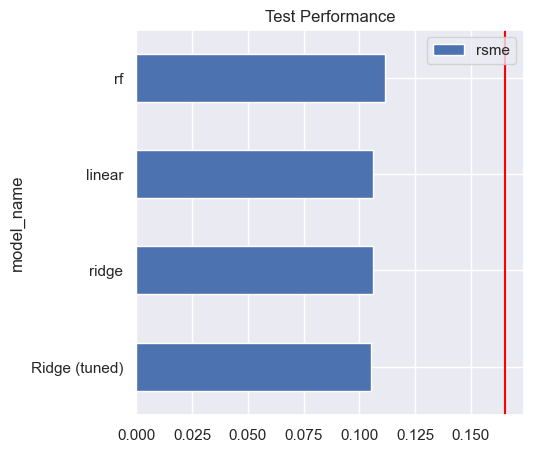

In [ ]:
test_df = pd.DataFrame({
    'model_name': model_names,
    'rsme': test_results
})

test_df.sort_values('rsme').plot.barh(x='model_name')
plt.vlines(0.16541376177840117, -5, 5, 'red', label='Naive model')
plt.title('Test Performance')
plt.show()

**Model Evaluation**

Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach

**Evaluation Strategy**
* First, I have set aside 10% of my data as a final test set.
* Next, for validation, I used 10-Fold validation (repeated 3 times). Since the data set is small and the models that are chosen aren't very computationally expensive, I validated the models on random subsets multiple times to generate a distribution of model performance. This has shown me not only the average error but also spread. I am looking for a model that has low average error and small spread.
* Finally, I fit the models on the whole dataset and then tested them against the held out test set to see its performance on never before seen data.

**Metric**
* I have chosen to use **root mean square error** as my evaluation metric.
* It is a very popular metric used for regression problems. It measure the distance of the predictions from the correct values and it penalizes very far-off predictions.

**Outcome**
* All models performed better than the naive model.
* For both the validation and testing, the fine tuned Ridge Regression model comes out on top, but it is only better by about 0.001.
* The Random Forest model was not able to outperform the linear models.
* Since we predicted attendance rates, if we transform it back to number of students, our model's prediction can be off by 2-3 students.
* I choose the Ridge Regression model as the better performing approach. At the scale of the dataset it is not much more complex as compared to linear regression, and by fine-tuning we can get slightly better performance.

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric. Have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study